In [1]:
clear all

In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from func_sdh_oe import *
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [18, 12]
matplotlib.rc('axes',edgecolor='none')
%matplotlib inline

dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/lamaclima_wp4/wbgt_labour/'

def get_data(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl2['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl3['wbgtod_iso_400W'].mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl2['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl3['wbgtod_iso_400W'].mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'][:,:,:].time
        da_2['time']=check['wbgtod_iso_400W'][:,:,:].time
        da_3['time']=check['wbgtod_iso_400W'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'][:,:,:].time
        da_2['time']=check['wbgtod_iso_400W'][:,:,:].time
        da_3['time']=check['wbgtod_iso_400W'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
def get_data_esi(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_esi_work_monthly_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_esi_work_monthly_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='ecearth':
        check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return (ds_cesm_presctl1['wbgtod'].mean('time')+ds_cesm_presctl2['wbgtod'].mean('time')+ds_cesm_presctl3['wbgtod'].mean('time'))/3
    else:
        if esm!='ecearth':
            da_1=ds_cesm_presctl1['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_2=ds_cesm_presctl2['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_3=ds_cesm_presctl3['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod'][:348,:,:].time
            da_2['time']=check['wbgtod'][:348,:,:].time
            da_3['time']=check['wbgtod'][:348,:,:].time
        else:
            da_1=ds_cesm_presctl1['wbgtod']
            da_2=ds_cesm_presctl2['wbgtod']
            da_3=ds_cesm_presctl3['wbgtod']
            check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod'][:,:,:].time
            da_2['time']=check['wbgtod'][:,:,:].time
            da_3['time']=check['wbgtod'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return (sum1)/3
def get_data_esi_labour(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='ecearth':
        check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl2['wbgtod_iso_400W'].mean('time')+ds_cesm_presctl3['wbgtod_iso_400W'].mean('time'))/3
    else:
        if esm!='ecearth':
            da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod_iso_400W'][:348,:,:].time
            da_2['time']=check['wbgtod_iso_400W'][:348,:,:].time
            da_3['time']=check['wbgtod_iso_400W'][:348,:,:].time
        else:
            da_1=ds_cesm_presctl1['wbgtod_iso_400W']
            da_2=ds_cesm_presctl2['wbgtod_iso_400W']
            da_3=ds_cesm_presctl3['wbgtod_iso_400W']
            check=xr.open_dataset(dir+esm+'/esi_work_3hr_'+esm+'_last30years_local-12h/wbgtod_iso_400W_esi_work_monthly_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod_iso_400W'][:,:,:].time
            da_2['time']=check['wbgtod_iso_400W'][:,:,:].time
            da_3['time']=check['wbgtod_iso_400W'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3


In [3]:
esm='cesm'
case='histctl'
ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
da_1['time']=check['wbgtod_iso_400W'].time
da_2['time']=check['wbgtod_iso_400W'].time
da_3['time']=check['wbgtod_iso_400W'].time
da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')

sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
sum2=sum1.values+da_3_seas.mean('time').values
sum1[:]=sum2

In [4]:


def get_data_DJF(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl1['wbgtod_iso_400W'][11::12], ds_cesm_presctl1['wbgtod_iso_400W'][12::12], ds_cesm_presctl1['wbgtod_iso_400W'][13::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl2['wbgtod_iso_400W'][11::12], ds_cesm_presctl2['wbgtod_iso_400W'][12::12], ds_cesm_presctl2['wbgtod_iso_400W'][13::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl3['wbgtod_iso_400W'][11::12], ds_cesm_presctl3['wbgtod_iso_400W'][12::12], ds_cesm_presctl3['wbgtod_iso_400W'][13::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl1['wbgtod_iso_400W'][11::12], ds_cesm_presctl1['wbgtod_iso_400W'][12::12], ds_cesm_presctl1['wbgtod_iso_400W'][13::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl2['wbgtod_iso_400W'][11::12], ds_cesm_presctl2['wbgtod_iso_400W'][12::12], ds_cesm_presctl2['wbgtod_iso_400W'][13::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][0:2,:,:],ds_cesm_presctl3['wbgtod_iso_400W'][11::12], ds_cesm_presctl3['wbgtod_iso_400W'][12::12], ds_cesm_presctl3['wbgtod_iso_400W'][13::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
        da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
        da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
        da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
        da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    
    
def get_data_MAM(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][2::12], ds_cesm_presctl1['wbgtod_iso_400W'][3::12], ds_cesm_presctl1['wbgtod_iso_400W'][4::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][2::12], ds_cesm_presctl2['wbgtod_iso_400W'][3::12], ds_cesm_presctl2['wbgtod_iso_400W'][4::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][2::12], ds_cesm_presctl3['wbgtod_iso_400W'][3::12], ds_cesm_presctl3['wbgtod_iso_400W'][4::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][2::12], ds_cesm_presctl1['wbgtod_iso_400W'][3::12], ds_cesm_presctl1['wbgtod_iso_400W'][4::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][2::12], ds_cesm_presctl2['wbgtod_iso_400W'][3::12], ds_cesm_presctl2['wbgtod_iso_400W'][4::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][2::12], ds_cesm_presctl3['wbgtod_iso_400W'][3::12], ds_cesm_presctl3['wbgtod_iso_400W'][4::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[2::12], da_1[3::12], da_1[4::12]], dim='time')
        da_2_seas = xr.concat([da_2[2::12], da_2[3::12], da_2[4::12]], dim='time')
        da_3_seas = xr.concat([da_3[2::12], da_3[3::12], da_3[4::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[2::12], da_1[3::12], da_1[4::12]], dim='time')
        da_2_seas = xr.concat([da_2[2::12], da_2[3::12], da_2[4::12]], dim='time')
        da_3_seas = xr.concat([da_3[2::12], da_3[3::12], da_3[4::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    

def get_data_JJA(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][5::12], ds_cesm_presctl1['wbgtod_iso_400W'][6::12], ds_cesm_presctl1['wbgtod_iso_400W'][7::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][5::12], ds_cesm_presctl2['wbgtod_iso_400W'][6::12], ds_cesm_presctl2['wbgtod_iso_400W'][7::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][5::12], ds_cesm_presctl3['wbgtod_iso_400W'][6::12], ds_cesm_presctl3['wbgtod_iso_400W'][7::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][6::12], ds_cesm_presctl1['wbgtod_iso_400W'][5::12], ds_cesm_presctl1['wbgtod_iso_400W'][7::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][6::12], ds_cesm_presctl2['wbgtod_iso_400W'][5::12], ds_cesm_presctl2['wbgtod_iso_400W'][7::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][6::12], ds_cesm_presctl3['wbgtod_iso_400W'][5::12], ds_cesm_presctl3['wbgtod_iso_400W'][7::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[6::12], da_1[5::12], da_1[7::12]], dim='time')
        da_2_seas = xr.concat([da_2[6::12], da_2[5::12], da_2[7::12]], dim='time')
        da_3_seas = xr.concat([da_3[6::12], da_3[5::12], da_3[7::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[5::12], da_1[6::12], da_1[7::12]], dim='time')
        da_2_seas = xr.concat([da_2[5::12], da_2[6::12], da_2[7::12]], dim='time')
        da_3_seas = xr.concat([da_3[5::12], da_3[6::12], da_3[7::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    
def get_data_SON(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][8::12], ds_cesm_presctl1['wbgtod_iso_400W'][9::12], ds_cesm_presctl1['wbgtod_iso_400W'][10::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][8::12], ds_cesm_presctl2['wbgtod_iso_400W'][9::12], ds_cesm_presctl2['wbgtod_iso_400W'][10::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][8::12], ds_cesm_presctl3['wbgtod_iso_400W'][9::12], ds_cesm_presctl3['wbgtod_iso_400W'][10::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_iso_400W'][8::12], ds_cesm_presctl1['wbgtod_iso_400W'][9::12], ds_cesm_presctl1['wbgtod_iso_400W'][10::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_iso_400W'][8::12], ds_cesm_presctl2['wbgtod_iso_400W'][9::12], ds_cesm_presctl2['wbgtod_iso_400W'][10::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_iso_400W'][8::12], ds_cesm_presctl3['wbgtod_iso_400W'][9::12], ds_cesm_presctl3['wbgtod_iso_400W'][10::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[8::12], da_1[9::12], da_1[10::12]], dim='time')
        da_2_seas = xr.concat([da_2[8::12], da_2[9::12], da_2[10::12]], dim='time')
        da_3_seas = xr.concat([da_3[8::12], da_3[9::12], da_3[10::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'mpiesm/wbgt-liljegren_work_mon_mpiesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_iso_400W'].time
        da_2['time']=check['wbgtod_iso_400W'].time
        da_3['time']=check['wbgtod_iso_400W'].time
        da_1_seas = xr.concat([da_1[8::12], da_1[9::12], da_1[10::12]], dim='time')
        da_2_seas = xr.concat([da_2[8::12], da_2[9::12], da_2[10::12]], dim='time')
        da_3_seas = xr.concat([da_3[8::12], da_3[9::12], da_3[10::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    

<Figure size 432x288 with 0 Axes>

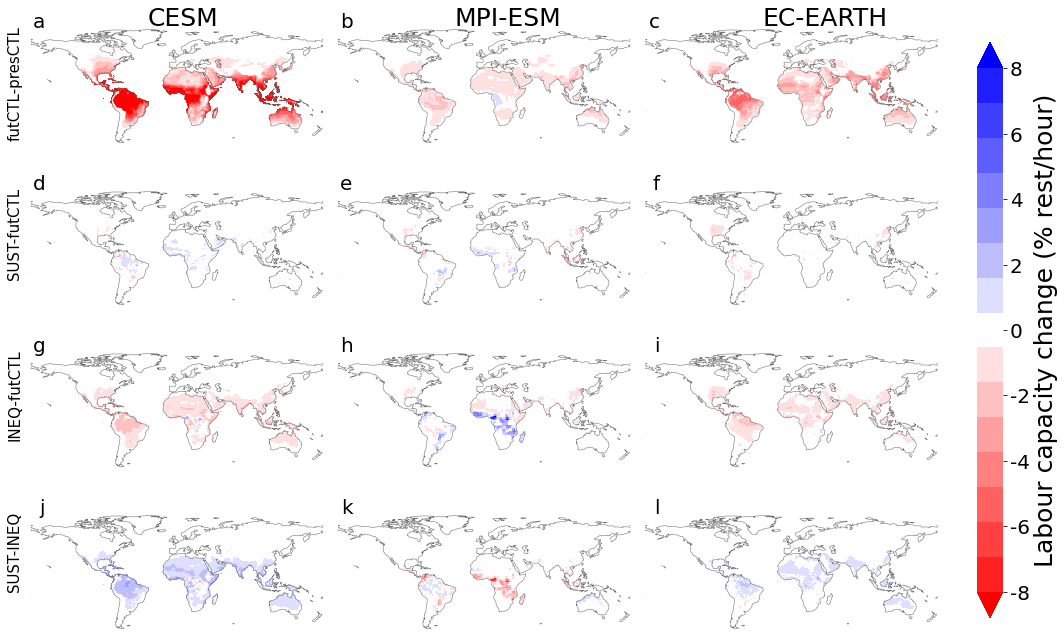

In [7]:

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (% rest/hour)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


In [8]:

# Assuming da_delta_ens_all_ineq is your DataArray
da = da_delta_ens_all_ineq.mean(['time','ens_member'])

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

ValueError: 'time' not found in array dimensions ('lat', 'lon')

<xarray.DataArray 'wbgtod_iso_400W' (lat: 256, lon: 512)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46


<Figure size 432x288 with 0 Axes>

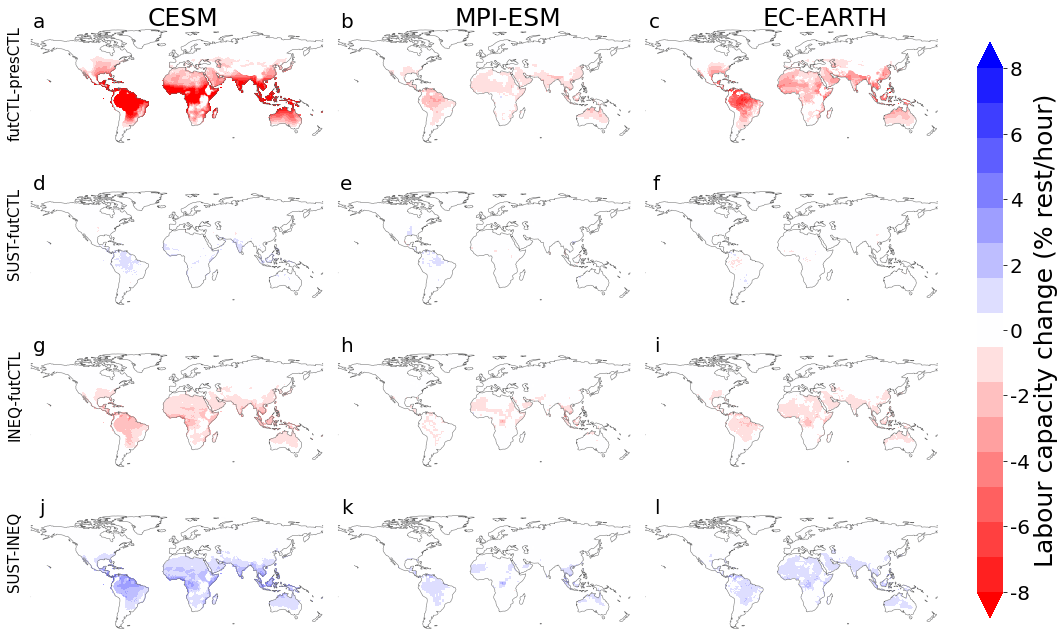

In [10]:

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (% rest/hour)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        print(da_delta_ens_all_ctl)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            da1=da
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


<xarray.DataArray 'wbgtod' (lat: 256, lon: 512)>
array([[0.7421875 , 0.74158096, 0.74095535, ..., 0.74279404, 0.7422676 ,
        0.74173355],
       [0.6967735 , 0.69548035, 0.694191  , ..., 0.69937134, 0.6980705 ,
        0.6967659 ],
       [0.630764  , 0.6296387 , 0.62851334, ..., 0.6349716 , 0.6332283 ,
        0.6315193 ],
       ...,
       [2.807953  , 2.8072662 , 2.8065586 , ..., 2.8095016 , 2.808529  ,
        2.8075714 ],
       [2.7903328 , 2.7899227 , 2.7894764 , ..., 2.7905617 , 2.7901344 ,
        2.7897034 ],
       [2.7709312 , 2.770649  , 2.7703495 , ..., 2.7710037 , 2.7707424 ,
        2.770485  ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46


<Figure size 432x288 with 0 Axes>

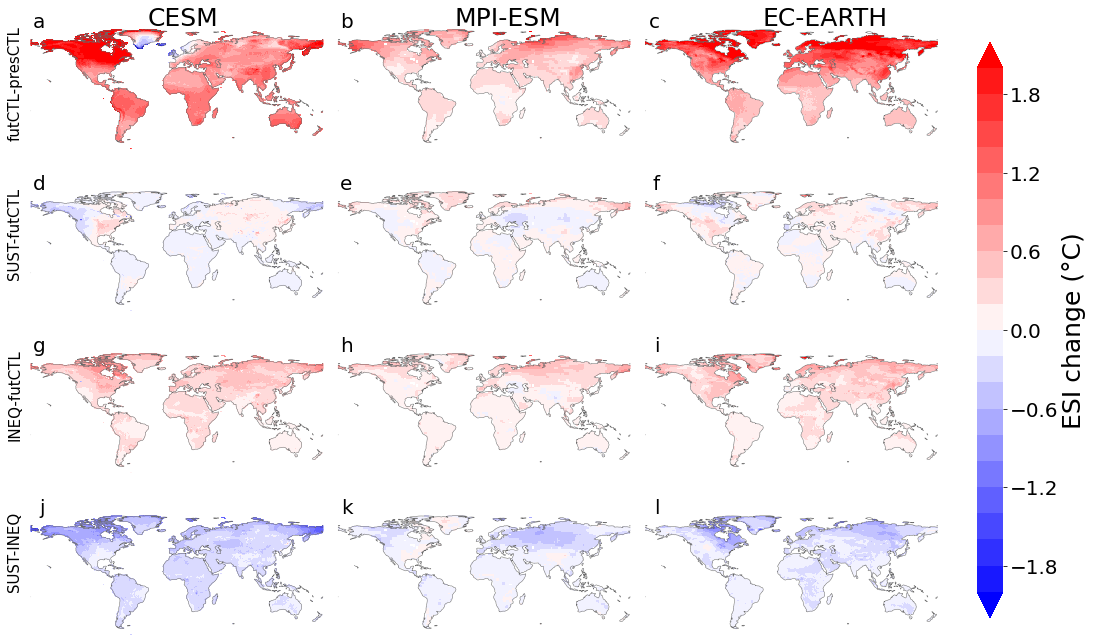

In [11]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'ESI change (°C)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        print(da_delta_ens_all_ctl)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            da1=da
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


<Figure size 432x288 with 0 Axes>

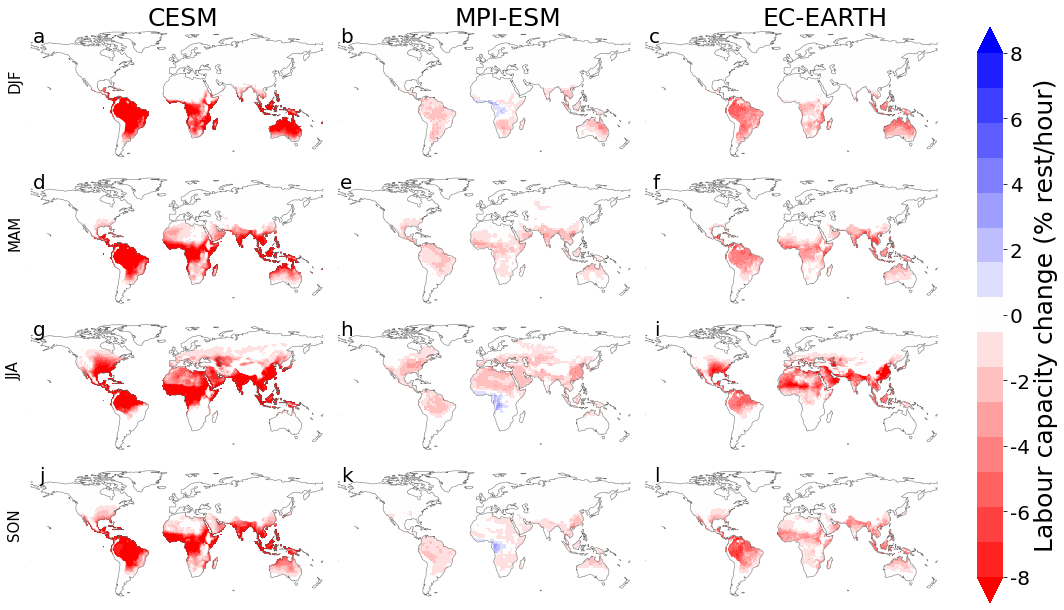

In [5]:

mpl.rc('axes',edgecolor='none')

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (% rest/hour)'

title = 'Near-surface temperature change (DJF)'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [8]:
da_delta_JJA = get_data_JJA('mpiesm','futctl')-get_data_JJA('mpiesm','histctl')

# Assuming da_delta_ens_all_ineq is your DataArray
da = da_delta_JJA

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

Value: 2.862177543691601, Latitude: 4.663149706177884, Longitude: 13.125
Value: 2.9863084471121226, Latitude: -8.393668907692383, Longitude: 15.0
Value: 2.996479829750129, Latitude: -0.932629967837991, Longitude: 11.25
Value: 3.118170435292697, Latitude: -6.5284094014799905, Longitude: 20.625
Value: 3.9002773572009914, Latitude: -6.5284094014799905, Longitude: 18.75
Value: 3.1825655664408785, Latitude: -2.797889876956741, Longitude: 11.25
Value: 3.477857209245016, Latitude: -4.663149706177884, Longitude: 18.75
Value: 3.3375047003336533, Latitude: -8.393668907692383, Longitude: 16.875
Value: 3.4788758700214544, Latitude: -6.5284094014799905, Longitude: 16.875
Value: 3.239572592345837, Latitude: -4.663149706177884, Longitude: 16.875


<Figure size 432x288 with 0 Axes>

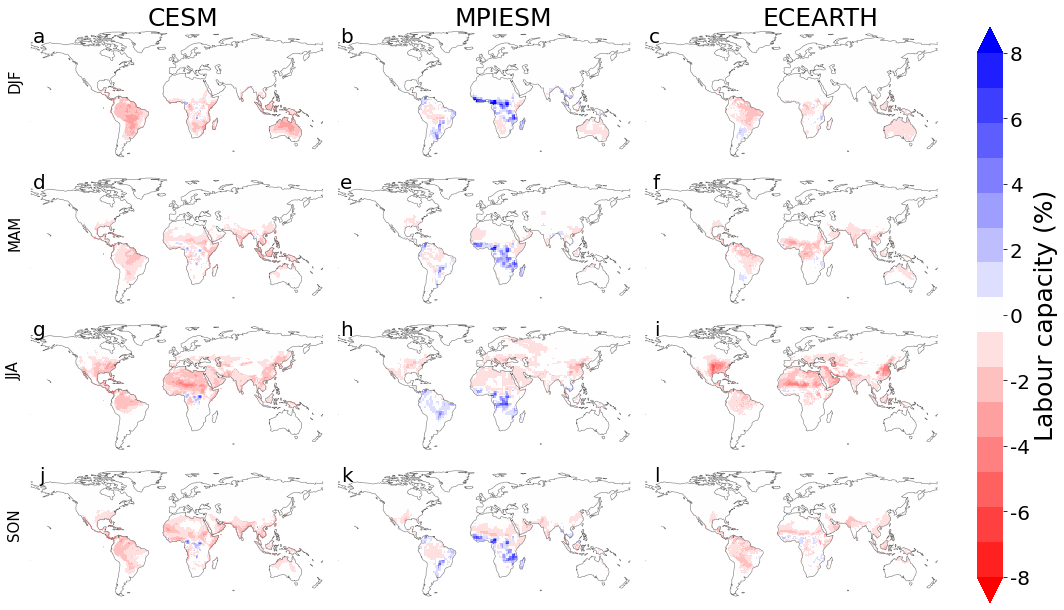

In [7]:

mpl.rc('axes',edgecolor='none')

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 432x288 with 0 Axes>

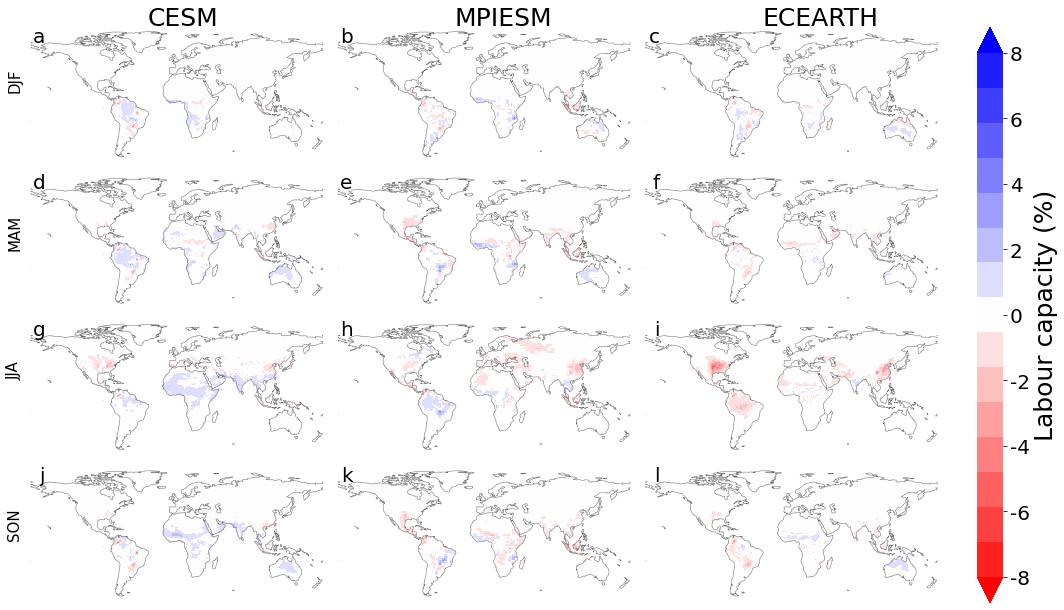

In [8]:

mpl.rc('axes',edgecolor='none')

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 432x288 with 0 Axes>

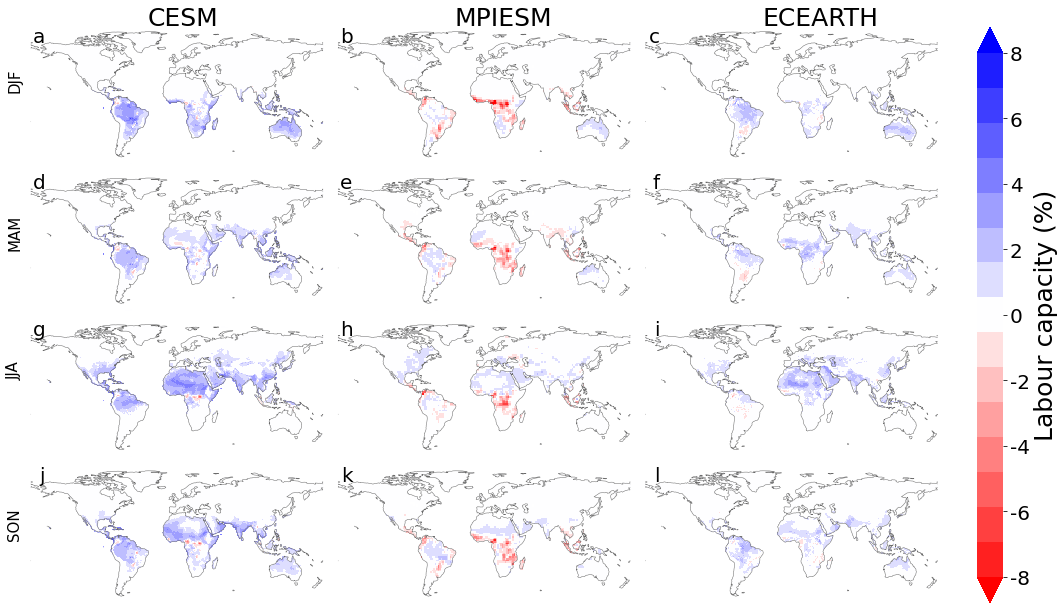

In [9]:

mpl.rc('axes',edgecolor='none')

vmin = -8
vmax = 8
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-8,-6,-4,-2,0,2,4,6,8])
cbar.set_ticklabels(["-8","-6","-4","-2","0","2","4","6","8"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [9]:
get_data_esi_labour(esm,'futctl')

<xarray.DataArray 'wbgtod_iso_400W' (lat: 96, lon: 192)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57

In [18]:
get_data_DJF(esm,'futctl')

<xarray.DataArray 'wbgtod_iso_400W' (lat: 192, lon: 288)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [36]:
jos=get_data_JJA(esm,'futctl')-get_data_DJF(esm,'histctl')

In [42]:
get_data_JJA(esm,'futctl').min()

<xarray.DataArray 'wbgtod_iso_400W' ()>
array(15.40008896)